In [18]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import numpy as np 
import pandas as pd

In [20]:
inputData = pd.read_csv("/content/drive/My Drive/ChinaCrops1.csv",)

In [21]:
inputData.tail(200)

,Date,DOY,Temperature,Humidity,Precipitation,Wind,Crops
1627,6/15/2020,167,13.76,85.81,2.02,1.79,Rice
1628,6/16/2020,168,15.48,88.94,8.05,1.76,Rice
1629,6/17/2020,169,12.19,91.25,14.55,1.74,Rice
1630,6/18/2020,170,10.41,87.00,13.53,1.25,Rice
1631,6/19/2020,171,11.67,83.62,6.66,1.71,Rice
...,...,...,...,...,...,...,...
1822,12/27/2020,362,-0.83,46.31,0.06,0.80,Wheat
1823,12/28/2020,363,-3.26,75.38,0.29,2.06,Wheat
1824,12/29/2020,364,-9.54,87.75,0.79,2.25,Wheat
1825,12/30/2020,365,-9.87,85.88,0.12,2.09,Wheat


In [22]:
inputData.describe()

,DOY,Temperature,Humidity,Precipitation,Wind
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,183.200328,4.842917,81.164149,3.260597,1.508276
std,105.510948,6.602112,10.203479,5.150419,0.420506
min,1.000000,-14.680000,39.500000,0.000000,0.470000
25%,92.000000,-0.480000,76.880000,0.110000,1.230000
50%,183.000000,5.040000,84.120000,1.110000,1.500000
75%,274.500000,10.650000,88.500000,4.305000,1.750000
max,366.000000,16.290000,96.310000,51.200000,3.150000


In [23]:
inputData.isnull().sum()

Date             0
DOY              0
Temperature      0
Humidity         0
Precipitation    0
Wind             0
Crops            0
dtype: int64

In [24]:
inputData

,Date,DOY,Temperature,Humidity,Precipitation,Wind,Crops
0,1/1/2016,1,-1.78,76.25,0.20,0.88,Wheat
1,1/2/2016,2,-0.67,54.19,0.00,1.02,Wheat
2,1/3/2016,3,-1.69,63.69,0.06,1.28,Wheat
3,1/4/2016,4,-2.36,67.62,0.01,0.67,Wheat
4,1/5/2016,5,-1.77,51.56,0.00,0.95,Wheat
...,...,...,...,...,...,...,...
1822,12/27/2020,362,-0.83,46.31,0.06,0.80,Wheat
1823,12/28/2020,363,-3.26,75.38,0.29,2.06,Wheat
1824,12/29/2020,364,-9.54,87.75,0.79,2.25,Wheat
1825,12/30/2020,365,-9.87,85.88,0.12,2.09,Wheat


In [25]:
y = inputData['Crops']

In [26]:
y

0       Wheat
1       Wheat
2       Wheat
3       Wheat
4       Wheat
        ...  
1822    Wheat
1823    Wheat
1824    Wheat
1825    Wheat
1826    Wheat
Name: Crops, Length: 1827, dtype: object

In [27]:

one_hot_encoded_data = pd.get_dummies(y, columns = ['Crops'])
print(one_hot_encoded_data)

      Potato  Rice  Wheat
0          0     0      1
1          0     0      1
2          0     0      1
3          0     0      1
4          0     0      1
...      ...   ...    ...
1822       0     0      1
1823       0     0      1
1824       0     0      1
1825       0     0      1
1826       0     0      1

[1827 rows x 3 columns]


In [28]:
y = one_hot_encoded_data

In [29]:
y.tail(500)

,Potato,Rice,Wheat
1327,0,1,0
1328,0,1,0
1329,0,1,0
1330,0,1,0
1331,0,1,0
...,...,...,...
1822,0,0,1
1823,0,0,1
1824,0,0,1
1825,0,0,1


In [14]:
y

,Potato,Rice,Wheat
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1822,0,0,1
1823,0,0,1
1824,0,0,1
1825,0,0,1


In [30]:
X = inputData.drop(['Date', 'DOY', 'Crops', ], axis=1).copy()

In [31]:
X

,Temperature,Humidity,Precipitation,Wind
0,-1.78,76.25,0.20,0.88
1,-0.67,54.19,0.00,1.02
2,-1.69,63.69,0.06,1.28
3,-2.36,67.62,0.01,0.67
4,-1.77,51.56,0.00,0.95
...,...,...,...,...
1822,-0.83,46.31,0.06,0.80
1823,-3.26,75.38,0.29,2.06
1824,-9.54,87.75,0.79,2.25
1825,-9.87,85.88,0.12,2.09


In [32]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

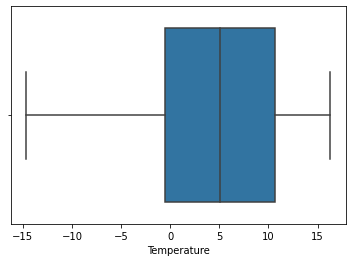

In [33]:
sns.boxplot(x=X['Temperature'])

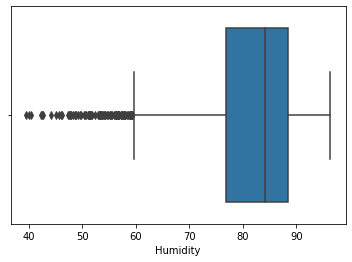

In [34]:
sns.boxplot(x=X['Humidity'])

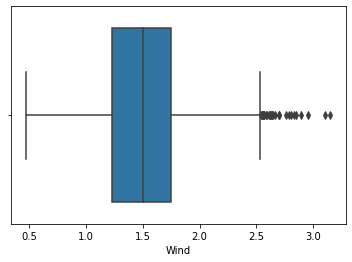

In [35]:
sns.boxplot(x=X['Wind'])

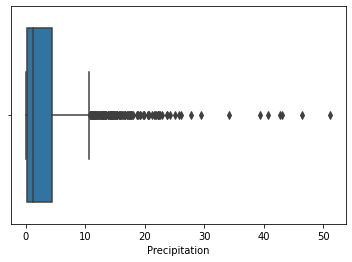

In [36]:
sns.boxplot(x=X['Precipitation'])

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
y=scaler.fit_transform(y) 

In [38]:
X=scaler.fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [40]:
X_train

array([[7.99160478e-01, 8.60411899e-01, 1.25390625e-01, 5.03731343e-01],
       [9.32192444e-01, 8.89984158e-01, 7.26562500e-02, 3.43283582e-01],
       [7.24895060e-01, 8.50378454e-01, 3.26171875e-02, 3.91791045e-01],
       ...,
       [7.31675815e-01, 7.18359444e-01, 3.96484375e-02, 5.37313433e-01],
       [3.62608976e-01, 4.80725224e-01, 7.61718750e-03, 3.61940299e-01],
       [4.02001937e-01, 3.25646893e-01, 3.90625000e-04, 3.43283582e-01]])

In [41]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [42]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=6, random_state=1)

In [43]:
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [44]:
pred

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [45]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,pred)
print("The accuracy of this model is: ", a*100)

The accuracy of this model is:  79.23497267759562


In [46]:
from sklearn.metrics import classification_report, confusion_matrix
conf = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
print(conf)

[[ 31  16   3]
 [ 21 147  22]
 [  7   6 113]]


Text(0.5, 15.0, 'Predicted label')

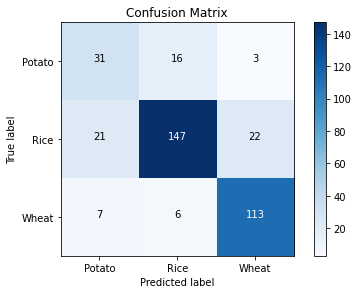

In [47]:
import itertools
classes = ['Potato', 'Rice', 'Wheat']
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)

In [49]:
clf1.fit(X_train,y_train)
pred1=clf1.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
conf1 = confusion_matrix(y_test.argmax(axis=1), pred1.argmax(axis=1))
print(conf1)

[[ 34  12   4]
 [  7 168  15]
 [  5  10 111]]


Text(0.5, 15.0, 'Predicted label')

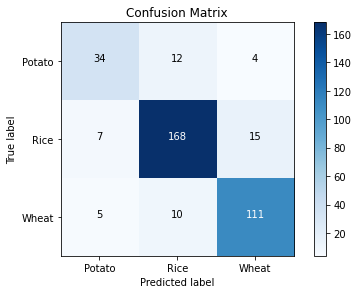

In [51]:
import itertools
classes = ['Potato', 'Rice', 'Wheat']
plt.imshow(conf1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf1.max() / 2.
for i, j in itertools.product(range(conf1.shape[0]), range(conf1.shape[1])):
    plt.text(j, i, format(conf1[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf1[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [52]:
from sklearn.metrics import accuracy_score
a1=accuracy_score(y_test,pred1)
print("The accuracy of this model is: ", a1*100)

The accuracy of this model is:  84.42622950819673


In [53]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

In [56]:
predknn=knn.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
a3=accuracy_score(y_test,predknn)
print("The accuracy of this model is: ", a3*100)

The accuracy of this model is:  80.32786885245902


In [58]:
from sklearn.metrics import classification_report, confusion_matrix
conf2 = confusion_matrix(y_test.argmax(axis=1), predknn.argmax(axis=1))
print(conf2)

[[ 32  13   5]
 [ 13 156  21]
 [  7  12 107]]


Text(0.5, 15.0, 'Predicted label')

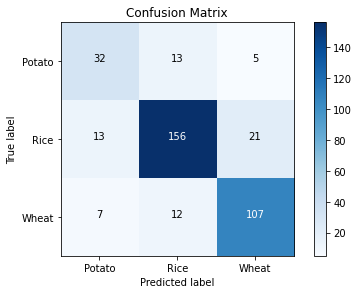

In [59]:
import itertools
classes = ['Potato', 'Rice', 'Wheat']
plt.imshow(conf2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf2.max() / 2.
for i, j in itertools.product(range(conf2.shape[0]), range(conf2.shape[1])):
    plt.text(j, i, format(conf2[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf2[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [60]:
from sklearn.ensemble import ExtraTreesClassifier

In [61]:
clf4 = ExtraTreesClassifier(n_estimators=100, random_state=0)

In [62]:
clf4.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [63]:
predext = clf4.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
a4=accuracy_score(y_test,predext)
print("The accuracy of this model is: ", a4*100)

The accuracy of this model is:  83.06010928961749


In [65]:
from sklearn.metrics import classification_report, confusion_matrix
conf5 = confusion_matrix(y_test.argmax(axis=1), predext.argmax(axis=1))
print(conf5)

[[ 34  14   2]
 [ 10 167  13]
 [  9  10 107]]


Text(0.5, 15.0, 'Predicted label')

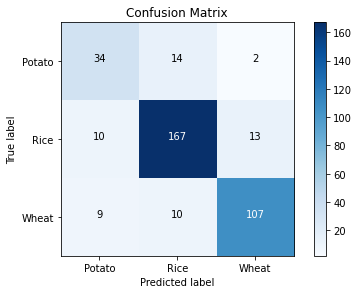

In [66]:
classes = ['Potato', 'Rice', 'Wheat']
plt.imshow(conf5, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf5.max() / 2.
for i, j in itertools.product(range(conf5.shape[0]), range(conf5.shape[1])):
    plt.text(j, i, format(conf5[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf5[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
from urllib.request import urlopen
import json
import time


READ_API_KEY='6B26HZM87MMH1OT6'
CHANNEL_ID= '1756435'


while True:
    TS = urlopen("http://api.thingspeak.com/channels/%s/feeds/last.json?api_key=%s" \
                       % (CHANNEL_ID,READ_API_KEY))

    response = TS.read()
    data=json.loads(response)


    a = data['created_at']
    b = data['field1']
    c = data['field2']
    d = data['field3']
    e = data['field4']
    X1 = [[b, c, d, e]]
    
    X1=scaler.fit_transform(X1)
    predIoT=clf1.predict(X1)
    print(predIoT)

    time.sleep(5)   

    TS.close()

[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]